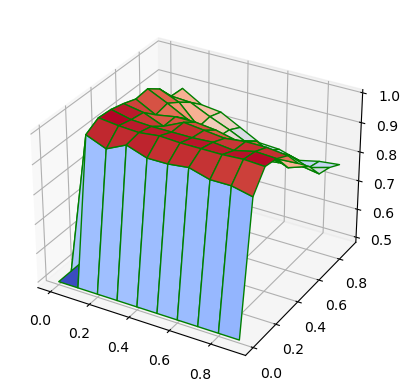

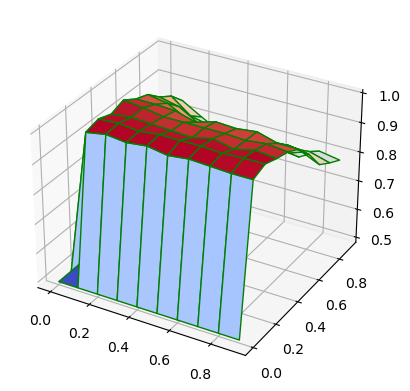

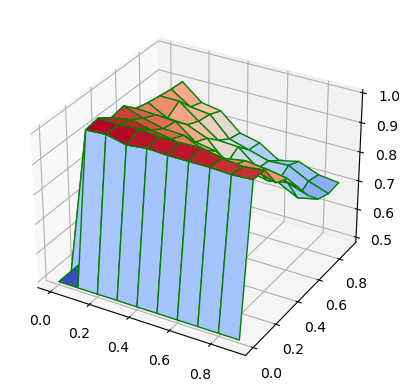

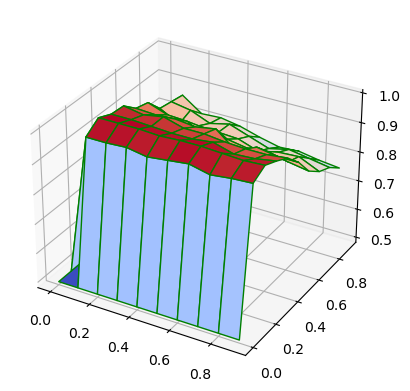

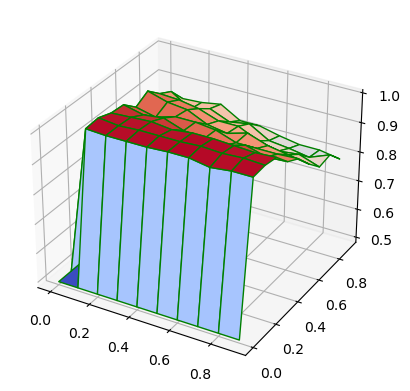

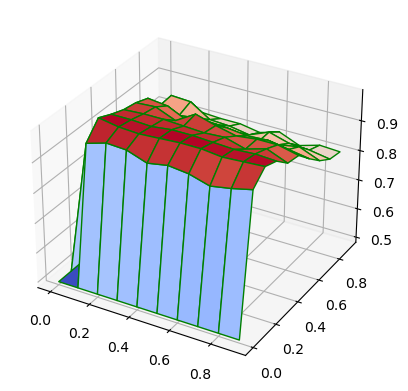

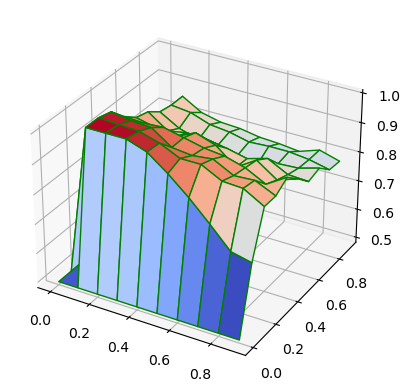

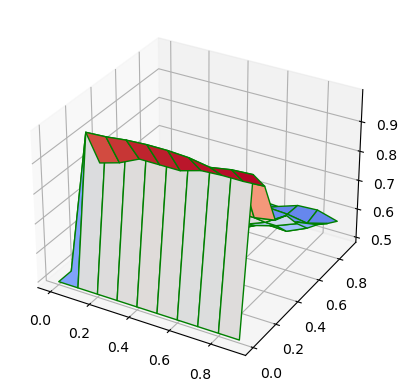

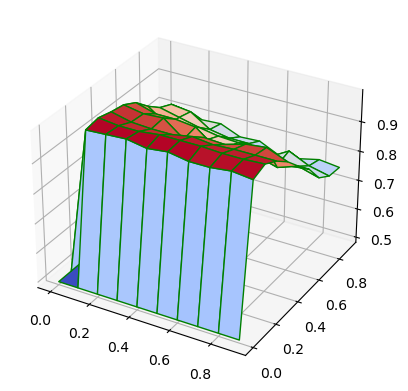

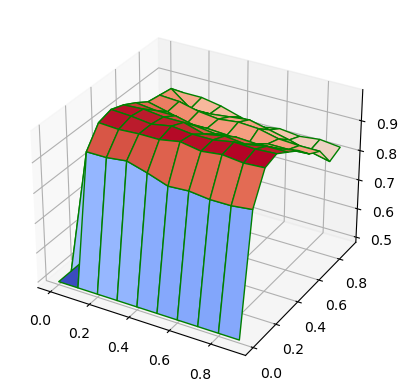

In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input350sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i,sample) in zip(range(len(sample_list)),sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['accuracy_w1_w2'], cmap ='coolwarm', edgecolor ='green')
    fig.savefig("3d_plot_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in zip(range(len(axis_std_w1)),axis_std_w1):
        for (k,std_w2) in zip(range(len(axis_std_w2)), axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]


In [2]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.97421875, 0.97539062, 0.978125  , 0.96875   ,
        0.96289062, 0.95742187, 0.94179687, 0.93867188, 0.93828125],
       [0.4921875 , 0.98085937, 0.97851562, 0.98085937, 0.98046875,
        0.97890625, 0.98046875, 0.97421875, 0.9734375 , 0.97148437],
       [0.4921875 , 0.95507812, 0.95      , 0.940625  , 0.93710938,
        0.93984375, 0.94648438, 0.94179687, 0.9453125 , 0.94179687],
       [0.4921875 , 0.9328125 , 0.92226562, 0.91992188, 0.91835937,
        0.91289062, 0.9140625 , 0.9171875 , 0.91835937, 0.91992188],
       [0.4921875 , 0.90546875, 0.90429688, 0.89335937, 0.89414063,
        0.8890625 , 0.87109375, 0.8859375 , 0.87382812, 0.88007813],
       [0.4921875 , 0.89570313, 0.87265625, 0.85664063, 0.84492188,
        0.83945313, 0.83476562, 0.83984375, 0.83164063, 0.83085937],
       [0.4921875 , 0.87304688, 0.8511718

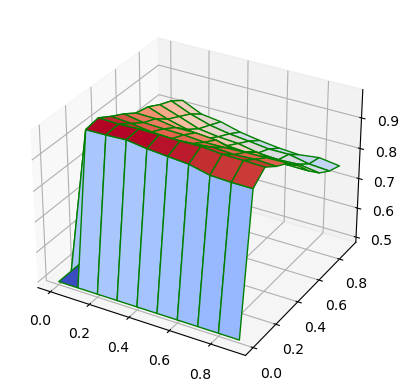

In [3]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
fig.savefig("average_accuracy_grid_over_10_samples.png".format(sample))

In [4]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples*100)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [5]:
best_w1_w2

(2, 1)

In [6]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [7]:
average_accuracy_grid_10_by_10_10_samples[2]

array([0.4921875 , 0.98085937, 0.97851562, 0.98085937, 0.98046875,
       0.97890625, 0.98046875, 0.97421875, 0.9734375 , 0.97148437])

In [8]:
average_accuracy_grid_10_by_10_10_samples[:,1]

array([0.4921875 , 0.97421875, 0.98085937, 0.95507812, 0.9328125 ,
       0.90546875, 0.89570313, 0.87304688, 0.85585937, 0.82773438])

In [9]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_accuracy_grid_10_by_10_10_samples[2])
std_dev_w2 = np.std(average_accuracy_grid_10_by_10_10_samples[:,1])

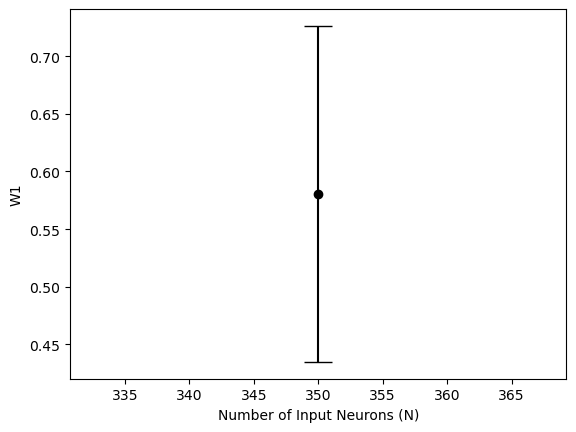

In [10]:
fig, ax = plt.subplots()
ax.scatter(350, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(350, array_best_w1_best_w2[0]/0.3445, std_dev_w1, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("W1")
fig.savefig("input350forW1.png")

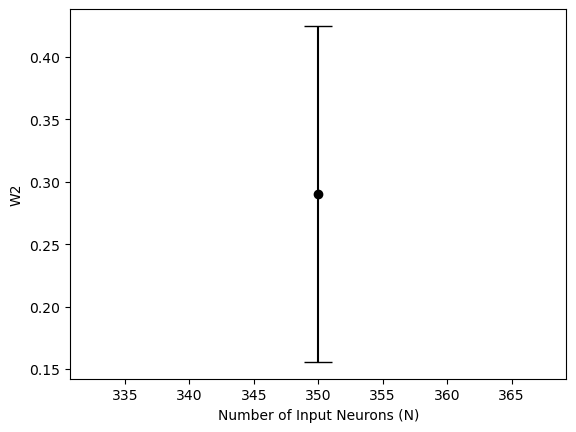

In [11]:
fig2, ax2 = plt.subplots()
ax2.scatter(350, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(350, array_best_w1_best_w2[1]/0.3445, std_dev_w2, capsize=10.0, color= "k")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("W2")
fig2.savefig("input350forW2.png")

In [12]:
data = {}
data['N'] = 350
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2
np.savez("350_input_neurons_w1_w2.npz",**data)